<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm


<ipython-input-1-7782687bcd67>:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Life Expectancy Data.csv"
df= pd.read_csv(path)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score                # we are using this for model tunning

from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
df.dropna(inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
df1=df.copy()
df1.to_csv('cleaned.csv')

In [13]:
logdata = df.copy()

In [14]:
logdata.drop(["Country"], axis=1, inplace=True)  
logdata.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
logdata["Status"].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

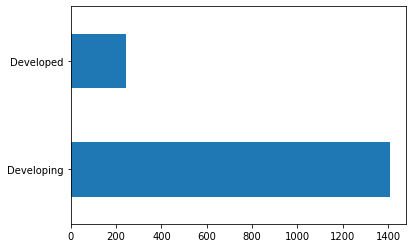

In [16]:
logdata["Status"].value_counts().plot.barh();

In [17]:
logdata.Status = [1 if each == "Developing" else 0 for each in logdata.Status]

In [18]:
logdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Status,1649.0,8.532444e-01,3.539695e-01,0.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01


In [19]:
y = logdata["Status"]
X_data = logdata.drop(["Status"], axis=1)

In [20]:
X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

In [21]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

         Current function value: 0.150274
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1629
Method:                           MLE   Df Model:                           19
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.6397
Time:                        10:16:02   Log-Likelihood:                -247.80
converged:                      False   LL-Null:                       -687.70
Covariance Type:            nonrobust   LLR p-value:                2.266e-174
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                1.1540      0.454      2.541      0.011       0.264       2.044
Life expectancy                     3.9170      1.395      2.808      0.005       1.183       6.651
Adult Mortality                     8.9129      1.573      5.666      0.000       5.830      11.996
infant deaths                     193.0996    567.163      0.340      0.734    -918.519    1304.718
Alcohol                            -7.0471      0.741     -9.507      0.000      -8.500      -5.594
percentage expenditure              2.6330      2.749      0.958      0.338      -2.755       8.021
Hepatitis B                        -2.1891      0.551     -3.975      0.000      -3.269      -1.110
Measles                            -4.6191      8.644     -0.534      0.593     -21.561      12.323
 BMI                                0.6859      0.497      1.379      0.168      -0.289       1.661
under-five deaths                 428.0952    667.107      0.642      0.521    -879.411    1735.602
Polio                               0.4442      0.755      0.588      0.556      -1.036       1.924
Total expenditure                   0.4667      0.649      0.719      0.472      -0.805       1.738
Diphtheria                          1.4299      0.773      1.850      0.064      -0.085       2.945
 HIV/AIDS                        6172.1062    1.4e+05      0.044      0.965   -2.68e+05     2.8e+05
GDP                                -5.0199      2.755     -1.822      0.068     -10.419       0.379
Population                        -13.5912     11.515     -1.180      0.238     -36.159       8.977
 thinness  1-19 years              21.1931      7.053      3.005      0.003       7.370      35.016
 thinness 5-9 years               -11.7773      6.500     -1.812      0.070     -24.516       0.962
Income composition of resources    -0.7261      1.341     -0.541      0.588      -3.355       1.903
Schooling                          -2.5020      1.499     -1.669      0.095      -5.439       0.435
===================================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [23]:
loj_model.intercept_

array([5.83327627])

In [24]:
loj_model.coef_

array([[ 1.08208352, -1.39357844,  3.4092507 ,  0.47089776, -5.35962717,
        -0.78837698, -1.44070589,  0.37059599, -0.05002695,  0.43758173,
         0.22862697, -0.10185549,  0.72963257,  0.51727771, -1.44175632,
         0.42676196,  1.95007174,  1.79088634, -1.29839592, -1.92931239]])

In [25]:
y_pred = loj_model.predict(X)    

Confusion Matrix: Those that are 1 (PP) when it is 1 in reality, 0 (PN) when it is 1, 1 (NP) when it is 0 when it is 0 (NN) when it is 0.

In [26]:
confusion_matrix(y, y_pred)

array([[ 169,   73],
       [  45, 1362]])

In [27]:
accuracy_score(y, y_pred)

0.9284414796846574

In [28]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       242
           1       0.95      0.97      0.96      1407

    accuracy                           0.93      1649
   macro avg       0.87      0.83      0.85      1649
weighted avg       0.93      0.93      0.93      1649



In [29]:
loj_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [31]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9030303030303031

In [33]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8878787878787879